# Calculate the Wasserstein distance on empirical data points

In [1]:
import sys
sys.path.append('./lib')
import time
import ot
import numpy as np
from scipy.linalg import sqrtm
from PPMM_func import projOtm


# # Example 1: Data points with equal weights

Generate the data points from multivariate-Gaussian distribution, calcualte the true Wasserstein distance and the Sinkhorn distance

In [2]:
N = 10000
pp = 10
ITR = 100
Mu1 = np.repeat(1, pp)
Mu2 = np.repeat(-1, pp)

S1 = np.zeros((pp, pp))
S2 = np.zeros((pp, pp))

for i in range(pp):
    for j in range(pp):
        S1[i,j] = 0.8**(abs(i-j))
        S2[i,j] = 0.5**(abs(i-j))

a, b = np.ones((N,)) / N, np.ones((N,)) / N

np.random.seed(10)        
ori_dat = np.random.multivariate_normal(Mu1, S1, N)
des_dat = np.random.multivariate_normal(Mu2, S2, N)
#Calculate the true Wasserstein distance
W_true = np.sqrt(sum((Mu1-Mu2)**2)+np.matrix.trace(S1+S2-2*sqrtm(sqrtm(S1)@S2@sqrtm(S1))))
print('Finished data generatation.')
time_start=time.time()
#Calculate the true empirical Sinkhorn distance
Sinkhorn = np.sqrt(ot.bregman.empirical_sinkhorn2(ori_dat, des_dat, reg=1, a=a, b=b, verbose=False))
time_end=time.time()
print('Finished Sinkhorn(1), Time Lapse: ', time_end-time_start,'s')

Finished data generatation.
Finished Sinkhorn(1), Time Lapse:  20.37039351463318 s


Calculate the Wasserstein distance use difference projection-based methods

In [3]:
dist_hat_save = [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "SAVE")
    ddd = itr_data - ori_dat
    dist_hat_save.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished PPMM(SAVE), Time Lapse: ', time_end-time_start,'s')


dist_hat_dr = [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "DR")
    ddd = itr_data - ori_dat
    dist_hat_dr.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished PPMM(DR), Time Lapse: ', time_end-time_start,'s')



dist_hat_random = [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "RANDOM")
    ddd = itr_data - ori_dat
    dist_hat_random.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished RANDOM, Time Lapse: ', time_end-time_start,'s')



dist_hat_sliced= [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "SLICED", nslice=10)
    ddd = itr_data - ori_dat
    dist_hat_sliced.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished SLICED(10), Time Lapse: ', time_end-time_start,'s')


Finished PPMM(SAVE), Time Lapse:  3.8740620613098145 s
Finished PPMM(DR), Time Lapse:  4.00982403755188 s
Finished RANDOM, Time Lapse:  1.85603666305542 s
Finished SLICED(10), Time Lapse:  14.694088459014893 s


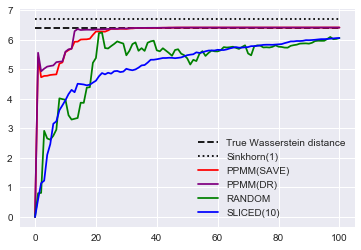

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
x = range(ITR+1)
plt.plot(x, np.repeat(W_true, ITR+1), color='black', linestyle='--', label='True Wasserstein distance')
plt.plot(x, np.repeat(Sinkhorn, ITR+1), color='black', linestyle=':', label='Sinkhorn(1)')
plt.plot(x, dist_hat_save, color='red', label='PPMM(SAVE)')
plt.plot(x, dist_hat_dr, color='purple', label='PPMM(DR)')
plt.plot(x, dist_hat_random, color='green', label='RANDOM')
plt.plot(x, dist_hat_sliced, color='blue', label='SLICED(10)')
plt.legend()

One can observe that PPMM converges to the true Wasserstein distance.
Also, PPMM converges faster than RANDOM and SLICED.

# # Example 2: Data points with unequal weights

In [5]:
N = 10000
pp = 10
ITR = 100
Mu1 = np.repeat(1, pp)
Mu2 = np.repeat(-1, pp)

S1 = np.zeros((pp, pp))
S2 = np.zeros((pp, pp))

for i in range(pp):
    for j in range(pp):
        S1[i,j] = 0.8**(abs(i-j))
        S2[i,j] = 0.5**(abs(i-j))

a_raw, b_raw = np.random.uniform(size=N), np.random.uniform(size=N)
a_raw[range(100)]=5000
b_raw[range(100)]=1000
a, b = a_raw/sum(a_raw), b_raw/sum(b_raw)

np.random.seed(10)        
ori_dat = np.random.multivariate_normal(Mu1, S1, N)
des_dat = np.random.multivariate_normal(Mu2, S2, N)

print('Finished data generatation.')
time_start=time.time()
#Calculate the true empirical Sinkhorn distance
Sinkhorn = np.sqrt(ot.bregman.empirical_sinkhorn2(ori_dat, des_dat, reg=1, a=a, b=b, verbose=False))
time_end=time.time()
print('Finished Sinkhorn(1), Time Lapse: ', time_end-time_start,'s')

Finished data generatation.
Finished Sinkhorn(1), Time Lapse:  21.397785186767578 s


In [6]:
dist_hat_save = [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "SAVE")
    ddd = itr_data - ori_dat
    dist_hat_save.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished PPMM(SAVE), Time Lapse: ', time_end-time_start,'s')


dist_hat_dr = [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "DR")
    ddd = itr_data - ori_dat
    dist_hat_dr.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished PPMM(DR), Time Lapse: ', time_end-time_start,'s')



dist_hat_random = [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "RANDOM")
    ddd = itr_data - ori_dat
    dist_hat_random.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished RANDOM, Time Lapse: ', time_end-time_start,'s')



dist_hat_sliced= [0]
itr_data = ori_dat

time_start=time.time()
for i in range(ITR):
    itr_data = projOtm(itr_data, des_dat, a, b, method = "SLICED", nslice=10)
    ddd = itr_data - ori_dat
    dist_hat_sliced.append(np.sqrt(np.mean(np.sum(ddd**2, axis = 1))))
time_end=time.time()
print('Finished SLICED(10), Time Lapse: ', time_end-time_start,'s')


Finished PPMM(SAVE), Time Lapse:  3.276237726211548 s
Finished PPMM(DR), Time Lapse:  3.604362964630127 s
Finished RANDOM, Time Lapse:  1.7553091049194336 s
Finished SLICED(10), Time Lapse:  13.138869524002075 s


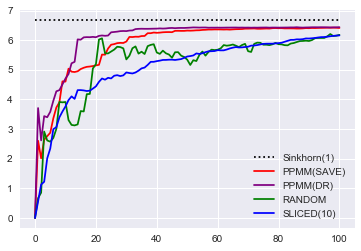

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
x = range(ITR+1)
plt.plot(x, np.repeat(Sinkhorn, ITR+1), color='black', linestyle=':', label='Sinkhorn(1)')
plt.plot(x, dist_hat_save, color='red', label='PPMM(SAVE)')
plt.plot(x, dist_hat_dr, color='purple', label='PPMM(DR)')
plt.plot(x, dist_hat_random, color='green', label='RANDOM')
plt.plot(x, dist_hat_sliced, color='blue', label='SLICED(10)')
plt.legend()